# Substructure search in a compound library + visualization

Authored by [Albert J. Kooistra](https://drug.ku.dk/staff/?pure=en/persons/612712), 2023, UCPH

**STEP 0: INITALIZE**

Here we load in all the dependencies we need, this lets Python understand small molecule chemistry and handle Excel-like files.

In [ ]:
!pip install rdkit-pypi -qqq

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

**STEP 1: READ COMPOUNDS**

In [ ]:
cpds = pd.read_csv("https://raw.githubusercontent.com/AJK-dev/course_materials/main/Ligand_based_machine_learning/data/EGFR_compounds_lipinski.csv", index_col=0)
PandasTools.AddMoleculeColumnToFrame(cpds, smilesCol='smiles', molCol='molecule')

**STEP 2: DEFINE SUBSTRUCTURE**

Define your substructure here, you can for example draw the substructre in ChemDraw and paste the SMILES below.

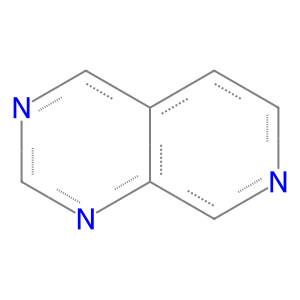

In [7]:
# Pyridopyrimidine
substructure_smiles = 'c12cnccc1cncn2'
substructure = Chem.MolFromSmarts(substructure_smiles)
Draw.MolToImage(substructure)

**STEP 3: EXECUTE SUBSTRUCTURE SEARCH**

Here we loop over all the compounds in the library. For each compound, we check if the compound has the substructure or not. If it has the substructure, then we store it for further inspection.

In [ ]:
matches = []
for index, row in cpds.iterrows():
  if row["molecule"].HasSubstructMatch(substructure):
    row["molecule"].SetProp("_Name", row["molecule_chembl_id"])
    result = row["molecule"].GetSubstructMatches(substructure)
    matches.append([row["molecule"], [match for matchmol in result for match in matchmol]])

print("IDENTIFIED", len(matches), " MOLECULES!")

**STEP 4: SHOW RESULTS FIRST HITS**

To check if all went well, we take the first *max_number* hits and show them. As a bonus, we also highlight where the substructure was found by showing the substructure in with red highlights.

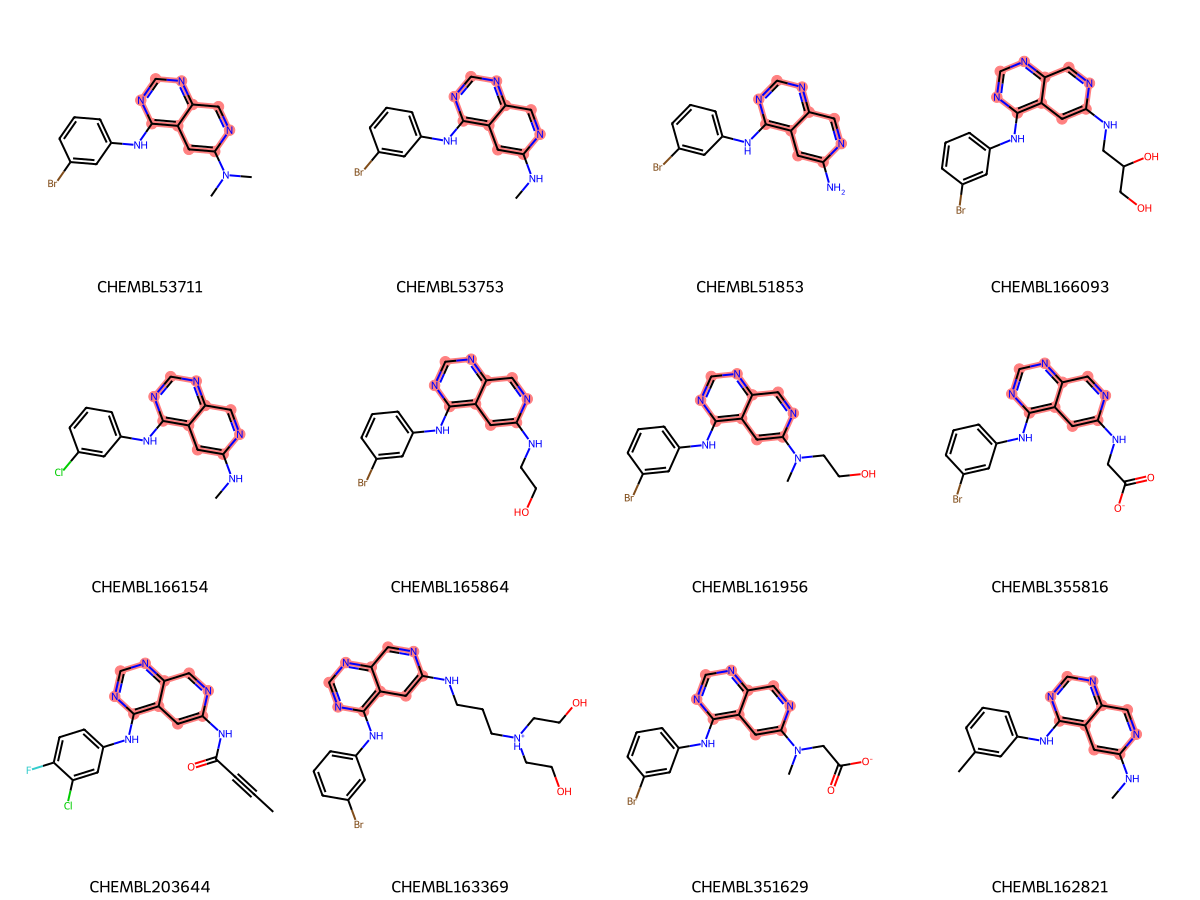

In [8]:
max_number = 12
selected_mols = [mol[0] for mol in matches[:max_number]]
selected_matches = [mol[1] for mol in matches[:max_number]]
Draw.MolsToGridImage(selected_mols, legends=[x.GetProp("_Name") for x in selected_mols], highlightAtomLists=selected_matches, subImgSize=[300, 300], molsPerRow=4)